i want to know how a conv layer see the world :) <br>
with cifar10 data amd keras <br>
based on: https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c

# libs

In [ ]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


how is the data?

shape of x train: (50000, 32, 32, 3) 
shape of each image (32, 32, 3)
a glance: [59 62 63]


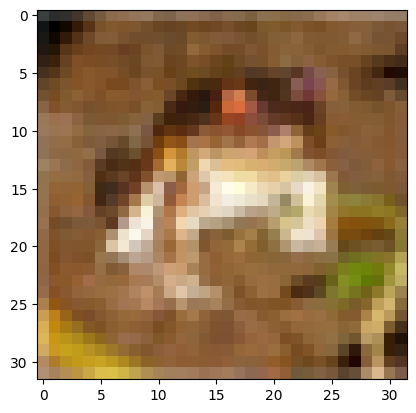

In [ ]:
plt.imshow(x_train[0])
print( f'shape of x train: {np.shape( x_train )} ' )
print( f'shape of each image {np.shape( x_train[0] )}' )
print('a glance:',x_train[0][0][0])

just for computational reasens

In [ ]:
x_train1=x_train/255
x_train1=x_train1.astype('float32')

ys? 

In [ ]:
y_train[0]

array([6], dtype=uint8)

ys are numbers and not one hot encoded form. this is important in the choice of loss function.

# the model

## model1 conv,conv




### basic visualization

In [ ]:

model1= tf.keras.models.Sequential([
    # 3 filters for every R G B layers
    tf.keras.layers.Conv2D( 3,(2,2),activation='relu',input_shape=(32,32,3),name='conv1',padding='same' ),
    # tf.keras.layers.MaxPooling2D(pool_size=(2,2),name='maxpool1'),
    tf.keras.layers.Conv2D( 3,(2,2),activation='relu',name='conv2',padding='same' ),
])


model1.compile()
model1.summary()

# its not important what loss or optimizer or metric is used, i just want to convolve an image NOT to fit it and get a result! btw tf will choose the best one

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 3)         39        
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 3)         39        
                                                                 
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# layers
successive_outputs = [layer.output for layer in model1.layers]

# get mini models from the layers
visualization_model=tf.keras.models.Model(inputs = model1.input, outputs = successive_outputs) 

# use the predict bc i want to pass an image and see the result
successive_feature_maps = visualization_model.predict(x_train1[0].reshape(1,32,32,3) )

np.shape(successive_feature_maps)

1/1 [==============================] - 0s 64ms/step


(2, 1, 32, 32, 3)

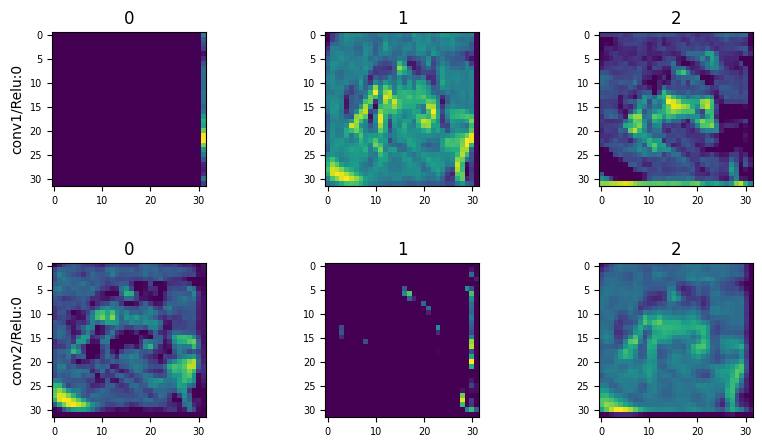

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
fig.subplots_adjust(hspace=.5)

for j in range(len(successive_feature_maps)): #rows
  for i in range(3): #columns

    if i==0:
      axs[j,i].set_ylabel( successive_outputs[j].name )

    axs[j,i].imshow( successive_feature_maps[j][0,:,:,i] )
    # Set the font size of the x-axis tick labels
    axs[j,i].tick_params(axis='x', labelsize=7)

    # Set the font size of the y-axis tick labels
    axs[j,i].tick_params(axis='y', labelsize=7)

    # axs[i].axis('off')
    axs[j,i].set_title(i)
    
    

### trained visualization -> conv,conv,flat,dense

now lets ttrain the model to see how weights are twisted!

In [ ]:

model1= tf.keras.models.Sequential([
    # 3 filters for every R G B layers
    tf.keras.layers.Conv2D( 3,(2,2),activation='relu',input_shape=(32,32,3),name='conv1',padding='same' ),
    # tf.keras.layers.MaxPooling2D(pool_size=(2,2),name='maxpool1'),
    tf.keras.layers.Conv2D( 3,(2,2),activation='relu',name='conv2',padding='same' ),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])


model1.compile()
model1.summary()

# its not important what loss or optimizer or metric is used, i just want to convolve an image NOT to fit it and get a result! btw tf will choose the best one

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 3)         39        
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 3)         39        
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30,808
Trainable params: 30,808
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.fit(x_train1[:5000],y_train[:5000],batch_size=32, epochs=10, verbose=1)

Epoch 1/10
157/157 [==============================] - 3s 17ms/step - loss: 1.6149 - accuracy: 0.4360
Epoch 2/10
157/157 [==============================] - 3s 17ms/step - loss: 1.5671 - accuracy: 0.4558
Epoch 3/10
157/157 [==============================] - 4s 27ms/step - loss: 1.5246 - accuracy: 0.4630
Epoch 4/10
157/157 [==============================] - 3s 17ms/step - loss: 1.4857 - accuracy: 0.4784
Epoch 5/10
157/157 [==============================] - 3s 17ms/step - loss: 1.4471 - accuracy: 0.4908
Epoch 6/10
157/157 [==============================] - 3s 17ms/step - loss: 1.4248 - accuracy: 0.5046
Epoch 7/10
157/157 [==============================] - 4s 24ms/step - loss: 1.4186 - accuracy: 0.5008
Epoch 8/10
157/157 [==============================] - 3s 19ms/step - loss: 1.3724 - accuracy: 0.5218
Epoch 9/10
157/157 [==============================] - 3s 17ms/step - loss: 1.3545 - accuracy: 0.5284
Epoch 10/10
157/157 [==============================] - 3s 17ms/step - loss: 1.3300 - accura

In [ ]:
# layers
successive_outputs = [layer.output for layer in model1.layers]

# get mini models from the layers
visualization_model=tf.keras.models.Model(inputs = model1.input, outputs = successive_outputs) 

# use the predict bc i want to pass an image and see the result
successive_feature_maps = visualization_model.predict(x_train1[0].reshape(1,32,32,3) )



1/1 [==============================] - 0s 107ms/step


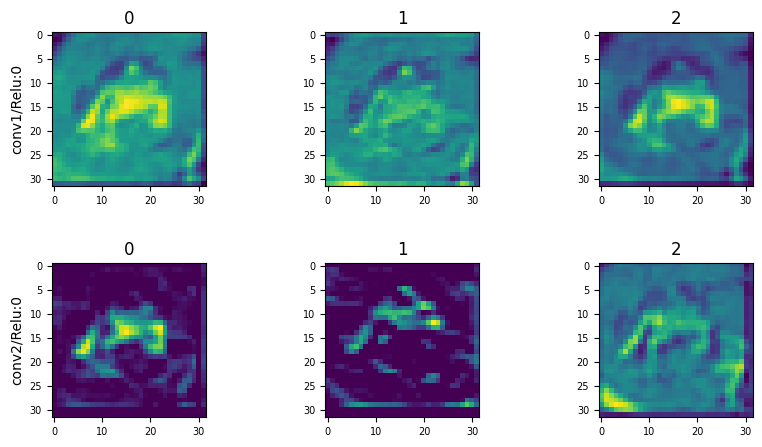

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
fig.subplots_adjust(hspace=.5)


for j in range(len(successive_feature_maps)): #rows
  feature_map= successive_feature_maps[j]
  if len(feature_map.shape) == 4:
    for i in range(3): #columns

      if i==0:
        axs[j,i].set_ylabel( successive_outputs[j].name )

      axs[j,i].imshow( feature_map[0,:,:,i] )
      # Set the font size of the x-axis tick labels
      axs[j,i].tick_params(axis='x', labelsize=7)

      # Set the font size of the y-axis tick labels
      axs[j,i].tick_params(axis='y', labelsize=7)

      # axs[i].axis('off')
      axs[j,i].set_title(i)
      
    

the result based on the simplicity of the model, number of training datas and epochs is not good, but i just want to visualize the progress of he weights setting!